In [5]:
%pip install plotly
%pip install pandas_datareader



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
import plotly.express as px

In [42]:
# name, source, start, end
data = web.DataReader('ETH-USD', 
                      'yahoo', 
                      start = '2021-01-01', 
                      end = '2021-09-07')

In [43]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,749.201843,719.792236,737.708374,730.367554,13652004358,730.367554
2021-01-02,786.798462,718.109497,730.402649,774.534973,19740771179,774.534973
2021-01-03,1006.565002,771.561646,774.511841,975.507690,45200463368,975.507690
2021-01-04,1153.189209,912.305359,977.058838,1040.233032,56945985763,1040.233032
2021-01-05,1129.371460,986.811279,1041.498779,1100.006104,41535932781,1100.006104
...,...,...,...,...,...,...
2021-09-03,3969.448730,3837.931152,3937.910156,3887.828369,20806963328,3887.828369
2021-09-04,3979.186523,3838.487305,3886.331055,3952.133545,18371468576,3952.133545
2021-09-05,3968.426514,3868.994385,3951.520752,3928.379395,18674691198,3928.379395


In [44]:
data['Close']

Date
2021-01-01     730.367554
2021-01-02     774.534973
2021-01-03     975.507690
2021-01-04    1040.233032
2021-01-05    1100.006104
                 ...     
2021-09-03    3887.828369
2021-09-04    3952.133545
2021-09-05    3928.379395
2021-09-06    3426.394287
2021-09-07    3497.315186
Name: Close, Length: 251, dtype: float64

In [45]:
data['Close'].index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-08-29', '2021-08-30', '2021-08-31', '2021-09-01',
               '2021-09-02', '2021-09-03', '2021-09-04', '2021-09-05',
               '2021-09-06', '2021-09-07'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [46]:
data['Close'].iloc[:30] #integer index,truncated slice

Date
2021-01-01     730.367554
2021-01-02     774.534973
2021-01-03     975.507690
2021-01-04    1040.233032
2021-01-05    1100.006104
2021-01-06    1207.112183
2021-01-07    1225.678101
2021-01-08    1224.197144
2021-01-09    1281.077271
2021-01-10    1262.246704
2021-01-11    1090.145386
2021-01-12    1043.434570
2021-01-13    1130.739380
2021-01-14    1218.453003
2021-01-15    1171.834595
2021-01-16    1233.537598
2021-01-17    1230.172241
2021-01-18    1257.279541
2021-01-19    1377.295898
2021-01-20    1382.274048
2021-01-21    1121.570923
2021-01-22    1236.512207
2021-01-23    1230.990601
2021-01-24    1391.609375
2021-01-25    1324.414795
2021-01-26    1357.058105
2021-01-27    1253.187134
2021-01-28    1298.101807
2021-01-29    1382.522827
2021-01-30    1376.115479
Name: Close, dtype: float64

In [48]:
train_df = pd.DataFrame(data['Close'].iloc[:30])
train_df

,Close
Date,
2021-01-01,730.367554
2021-01-02,774.534973
2021-01-03,975.507690
2021-01-04,1040.233032
2021-01-05,1100.006104
2021-01-06,1207.112183
2021-01-07,1225.678101
2021-01-08,1224.197144
2021-01-09,1281.077271


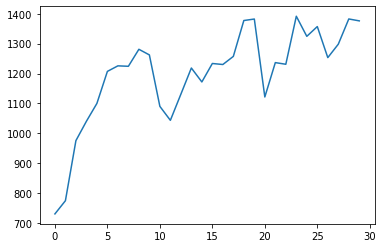

In [49]:
plt.plot(train_df['Close'].to_numpy())

In [50]:
px.line(train_df)

In [51]:
px.line(data, y = ['High', 'Low', 'Close', 'Open']) #for original data

In [52]:
train_df['lag_1'] = train_df['Close'].shift(1)
train_df

,Close,lag_1
Date,,
2021-01-01,730.367554,NaN
2021-01-02,774.534973,730.367554
2021-01-03,975.507690,774.534973
2021-01-04,1040.233032,975.507690
2021-01-05,1100.006104,1040.233032
2021-01-06,1207.112183,1100.006104
2021-01-07,1225.678101,1207.112183
2021-01-08,1224.197144,1225.678101
2021-01-09,1281.077271,1224.197144


In [53]:
#in range(include, exclude)
for i in range(2, 8):
    train_df[f'lag_{i}'] = train_df['Close'].shift(i)
train_df

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2021-01-01,730.367554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,774.534973,730.367554,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,975.507690,774.534973,730.367554,NaN,NaN,NaN,NaN,NaN
2021-01-04,1040.233032,975.507690,774.534973,730.367554,NaN,NaN,NaN,NaN
2021-01-05,1100.006104,1040.233032,975.507690,774.534973,730.367554,NaN,NaN,NaN
2021-01-06,1207.112183,1100.006104,1040.233032,975.507690,774.534973,730.367554,NaN,NaN
2021-01-07,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,774.534973,730.367554,NaN
2021-01-08,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,774.534973,730.367554
2021-01-09,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,774.534973


In [54]:
train_df = train_df.dropna()
train_df

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2021-01-08,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,774.534973,730.367554
2021-01-09,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,774.534973
2021-01-10,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690
2021-01-11,1090.145386,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032
2021-01-12,1043.434570,1090.145386,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104
2021-01-13,1130.739380,1043.434570,1090.145386,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183
2021-01-14,1218.453003,1130.739380,1043.434570,1090.145386,1262.246704,1281.077271,1224.197144,1225.678101
2021-01-15,1171.834595,1218.453003,1130.739380,1043.434570,1090.145386,1262.246704,1281.077271,1224.197144
2021-01-16,1233.537598,1171.834595,1218.453003,1130.739380,1043.434570,1090.145386,1262.246704,1281.077271


In [67]:
#We want: w1lag1^j + w2lag2^j + w3lag3^j+ ... + w7lag7^j = Close^j

cols = [f'lag_{i}' for i in range(1, 8)]

A = train_df[cols].to_numpy()

y = train_df['Close'].to_numpy()

In [68]:
# A * w = y, acturally impossible; maybe we want to minimize min_w ||Aw-y||_2?
# Maybe we can A^TAw^hat=A^Ty; w^hat = (A^TA)^(-1)A^Ty

w_hat = np.linalg.inv(A.T @ A) @ A.T @ y

In [69]:
train_df['predictions'] = A @ w_hat

<ipython-input-69-482cf8eb2aae>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
train_df

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,predictions
Date,,,,,,,,,
2021-01-08,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,774.534973,730.367554,1159.784515
2021-01-09,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,774.534973,1215.506729
2021-01-10,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,1271.317755
2021-01-11,1090.145386,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,1260.570521
2021-01-12,1043.434570,1090.145386,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1154.263518
2021-01-13,1130.739380,1043.434570,1090.145386,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1133.332395
2021-01-14,1218.453003,1130.739380,1043.434570,1090.145386,1262.246704,1281.077271,1224.197144,1225.678101,1188.723147
2021-01-15,1171.834595,1218.453003,1130.739380,1043.434570,1090.145386,1262.246704,1281.077271,1224.197144,1207.708265
2021-01-16,1233.537598,1171.834595,1218.453003,1130.739380,1043.434570,1090.145386,1262.246704,1281.077271,1151.254808


In [58]:
px.line(train_df, y = ['Close', 'predictions'])

In [70]:
# A is not good. we also need intersect/bias, y = w1^hatlag1 + b
#We want: w1lag1^j + w2lag2^j + w3lag3^j+ ... + w7lag7^j + w8*1 = Close^j
train_df['ones'] = np.ones(len(train_df['Close']))

<ipython-input-70-acff9ce33059>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
train_df

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,predictions,ones
Date,,,,,,,,,,
2021-01-08,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,774.534973,730.367554,1159.784515,1.0
2021-01-09,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,774.534973,1215.506729,1.0
2021-01-10,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,1271.317755,1.0
2021-01-11,1090.145386,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,1260.570521,1.0
2021-01-12,1043.434570,1090.145386,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1154.263518,1.0
2021-01-13,1130.739380,1043.434570,1090.145386,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1133.332395,1.0
2021-01-14,1218.453003,1130.739380,1043.434570,1090.145386,1262.246704,1281.077271,1224.197144,1225.678101,1188.723147,1.0
2021-01-15,1171.834595,1218.453003,1130.739380,1043.434570,1090.145386,1262.246704,1281.077271,1224.197144,1207.708265,1.0
2021-01-16,1233.537598,1171.834595,1218.453003,1130.739380,1043.434570,1090.145386,1262.246704,1281.077271,1151.254808,1.0


In [75]:
cols.append('ones')
A_bias = train_df[cols].to_numpy()
print(cols)

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'ones', 'ones']


In [73]:
w_hat_bias = np.linalg.inv(A_bias.T @ A_bias) @ A_bias.T @ y

In [81]:
train_df

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,predictions,ones,predictions_with_bias
Date,,,,,,,,,,,
2021-01-08,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,774.534973,730.367554,1159.784515,1.0,1199.321384
2021-01-09,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,774.534973,1215.506729,1.0,1238.115783
2021-01-10,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,1271.317755,1.0,1278.319389
2021-01-11,1090.145386,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,1260.570521,1.0,1256.139091
2021-01-12,1043.434570,1090.145386,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1154.263518,1.0,1165.282234
2021-01-13,1130.739380,1043.434570,1090.145386,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1133.332395,1.0,1165.430938
2021-01-14,1218.453003,1130.739380,1043.434570,1090.145386,1262.246704,1281.077271,1224.197144,1225.678101,1188.723147,1.0,1225.172291
2021-01-15,1171.834595,1218.453003,1130.739380,1043.434570,1090.145386,1262.246704,1281.077271,1224.197144,1207.708265,1.0,1239.896940
2021-01-16,1233.537598,1171.834595,1218.453003,1130.739380,1043.434570,1090.145386,1262.246704,1281.077271,1151.254808,1.0,1188.788558


In [80]:
train_df['predictions_with_bias'] = A_bias @ w_hat_bias

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 8 is different from 9)

In [82]:
px.line(train_df, y = ['Close', 'predictions', 'predictions_with_bias'])

In [89]:
y
y_hat1 = train_df['predictions'].to_numpy()
y_hat2 = train_df['predictions_with_bias'].to_numpy()

In [93]:
def MSRE(labels, predictions):
    return np.sqrt((labels - predictions)@(labels - predictions))

In [94]:
print(f'IN-Sample MSRE without bias = {MSRE(y, y_hat1)}')
print(f'In-Sample MSRE with bias = {MSRE(y, y_hat2)}')

IN-Sample MSRE without bias = 388.2164323771457
In-Sample MSRE with bias = 369.8880938349573


In [96]:
data['log_Close'] = np.log(data['Close'])

In [101]:
test_df = data['Close'].[-31:]

SyntaxError: invalid syntax (<ipython-input-101-6fcb3dfa2c45>, line 1)

In [98]:
A_bias.shape

(23, 9)

In [99]:
test_df = pd.DataFrame(test_df)
test_df.tail()

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,predictions,ones,predictions_with_bias
Date,,,,,,,,,,,
2021-01-08,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,774.534973,730.367554,1159.784515,1.0,1199.321384
2021-01-09,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,774.534973,1215.506729,1.0,1238.115783
2021-01-10,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,975.507690,1271.317755,1.0,1278.319389
2021-01-11,1090.145386,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1040.233032,1260.570521,1.0,1256.139091
2021-01-12,1043.434570,1090.145386,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1100.006104,1154.263518,1.0,1165.282234
2021-01-13,1130.739380,1043.434570,1090.145386,1262.246704,1281.077271,1224.197144,1225.678101,1207.112183,1133.332395,1.0,1165.430938
2021-01-14,1218.453003,1130.739380,1043.434570,1090.145386,1262.246704,1281.077271,1224.197144,1225.678101,1188.723147,1.0,1225.172291
2021-01-15,1171.834595,1218.453003,1130.739380,1043.434570,1090.145386,1262.246704,1281.077271,1224.197144,1207.708265,1.0,1239.896940
2021-01-16,1233.537598,1171.834595,1218.453003,1130.739380,1043.434570,1090.145386,1262.246704,1281.077271,1151.254808,1.0,1188.788558


In [ ]:
test_df = pd.DataFrame(data['Close'].iloc[-31:])

cols = []
for i in range(1, 8):
    test_df[f'lag_{i}'] = test_df['Close'].shift(i)
    cols.append(f'lag_{i}')
test_df = test_df.dropna()
test_df['ones'] = np.ones(len(test_df['Close']))
cols.append('ones')

In [ ]:
w_hat_bias

In [ ]:
test_df['predictions'] = test_df[cols].to_numpy() @ w_hat_bias

In [ ]:
y = test_df['Close'].to_numpy()
y_hat = test_df['predictions'].to_numpy()
print(f'MSRE = {MSRE(y, y_hat)}')

In [ ]:
px.line(test_df, y = )

In [102]:
test_df = pd.DataFrame(data['Close'].iloc[-31:])

In [103]:
test_df['lag_1'] = test_df['Close'].shift(1)

In [105]:
test_df['diff'] = test_df['Close'] - test_df['lag_1']

In [106]:
test_df

,Close,lag_1,diff
Date,,,
2021-08-08,3167.856201,NaN,NaN
2021-08-09,3141.691162,3167.856201,-26.165039
2021-08-10,3164.245117,3141.691162,22.553955
2021-08-11,3043.414307,3164.245117,-120.830811
2021-08-12,3322.211670,3043.414307,278.797363
2021-08-13,3265.443359,3322.211670,-56.768311
2021-08-14,3310.504150,3265.443359,45.060791
2021-08-15,3156.509521,3310.504150,-153.994629
2021-08-16,3014.845947,3156.509521,-141.663574


In [107]:
diff_df = pd.DataFrame(test_df['diff'])

In [110]:
diff_df = diff_df.dropna()

In [ ]:
cols = []
for i in range(1, 8):
    diff_df[f'lag_{i}'] = diff_df['diff'].shift(1)
    cols.append(f'lag_{i}')
diff_df.dropna()
diff_df['ones'] = np.ones(len(diff_df['Close']))

A = diff_df[cols].to_numpy()
y = diff_df['diff']

w_hat = np.linalg.iva(A.T @ A) @ A.T @ y
y_hat = A @ w_hat
diff_df

diff_df['predictions'] = A @ w_hat

ps.line(diff_df, y = ['diff', 'predictions'])